In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List
from scipy.stats import distributions, multivariate_normal

# import fitter
from HMC import HMC

import sys
sys.path.append("..")
from MCMC_DianZhang.Dian_MCMC.Statistic_tools import auto_corr_plot, targetDis_step_plot

In [2]:
from scipy.stats import multivariate_normal
from scipy.interpolate import griddata
#from scipy.optimize import curve_fit
from sklearn.mixture import GaussianMixture
from scipy.misc import derivative
import numpy as np
import matplotlib.pyplot as plt
from typing import List
from HMC import HMC
from GMM_Likelihoods import GaussianMixtureModel

In [3]:
dimensions = 2
components = 2
means = [[1, 1], [5, 5]]
covs = [[[1, 0], [0, 1]], 
        [[2, 0], [0, 2]]]
weights = [0.3, 0.7]

In [4]:
gmm1 = GaussianMixtureModel(n_dimensions = dimensions, 
                            n_components = components, 
                            means = means, 
                            covs = covs, 
                            weights = weights)

In [5]:
n_samples = 200
noise = 0.2
X1, noisy_data1 = gmm1.generate_data(n_samples, noise_scale = noise)

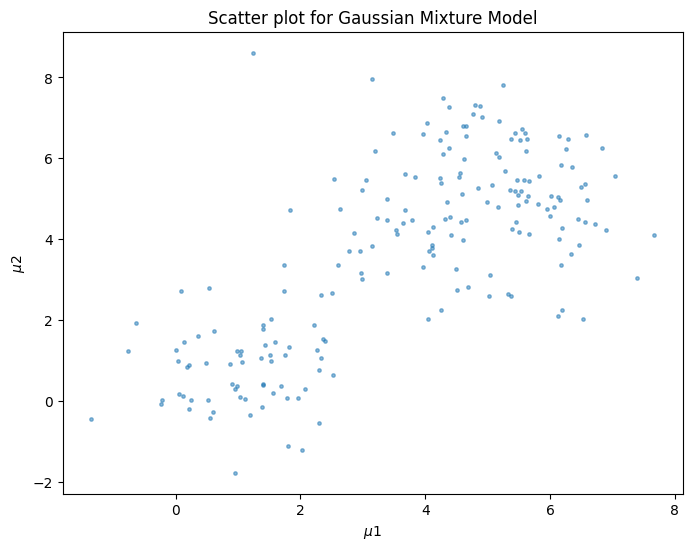

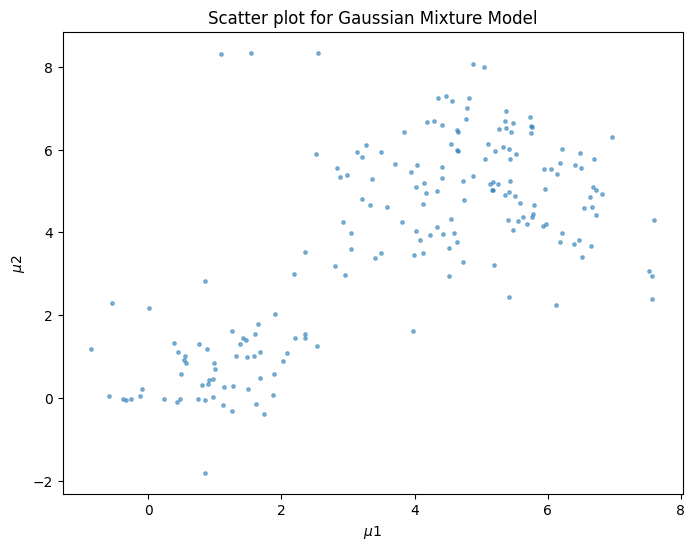

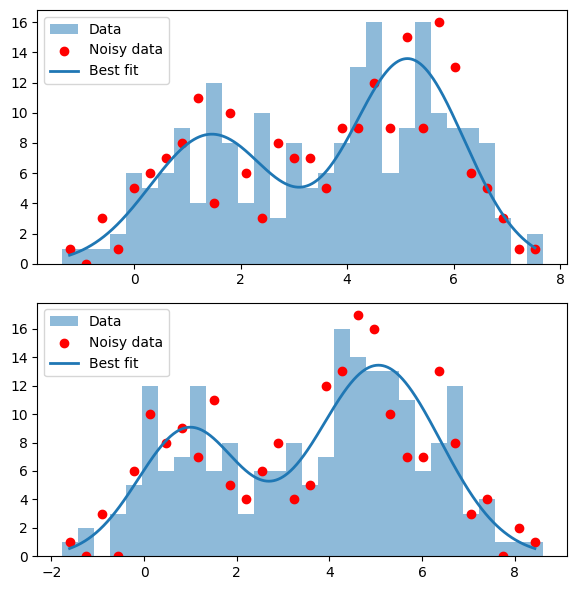

In [47]:
gmm1.plot_scatter(X1)
gmm1.plot_scatter(noisy_data1)
gmm1.plot_histograms(X1,noise_scale=noise)

In [6]:
logLikeli = gmm1.calculate_log_likelihoods_mu

In [7]:
logLikeli([[1, 1], [5, 5]])

-831.8200139842372

In [7]:
def U(theta: List[float]) -> float:
    '''
    the potential energy function: 
    U(theta) = -log(probability distribution of theta)
    '''
    return - logLikeli(theta)

def grad_U(theta: List[float]) -> float:
    '''
    the derivative of the potential energy function
    dU/dmu
    '''
    DRho = gmm1.dfdx(theta)
    Rho = - logLikeli(theta)
    return np.array([dRho/Rho for dRho in DRho])

In [8]:
theta_accept, theta_reject = HMC(epoch=3000, L=20, epsilon=0.01, U=U, grad_U=grad_U, current_theta=np.array([0,0,0,0]))

In [9]:
print("acceptance rate =", len(theta_accept)/(len(theta_accept)+len(theta_reject)))

acceptance rate = 0.20866666666666667


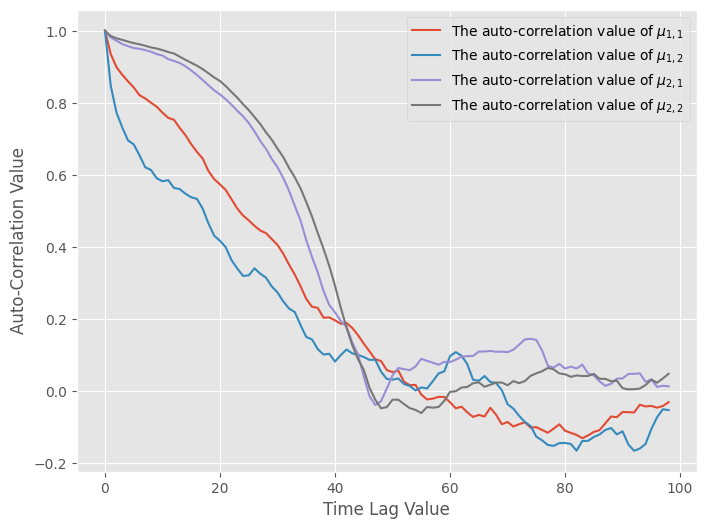

In [10]:
auto_corr_plot(theta_accept, plot_nth_theta=[0,1,2,3],theta_index=['$\mu_{1,1}$','$\mu_{1,2}$','$\mu_{2,1}$','$\mu_{2,2}$'],data_range=[0,3000],figsize=[8,6])

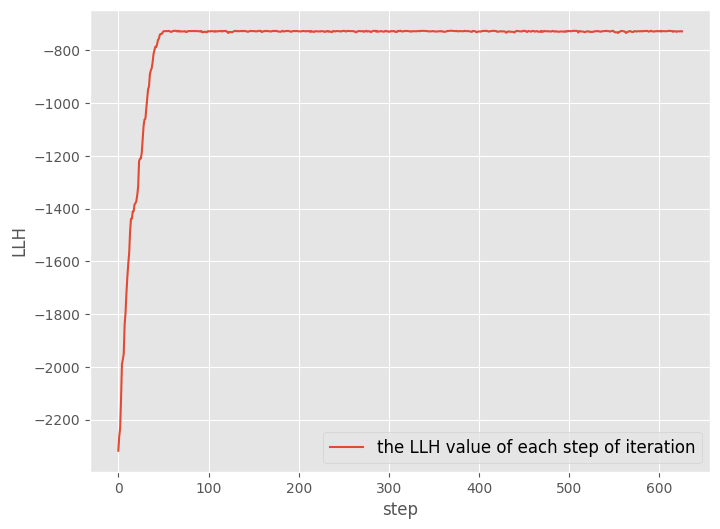

In [11]:
targetDis_step_plot(thetas=theta_accept, rho=logLikeli, target_type="LLH", figsize=(8, 6))

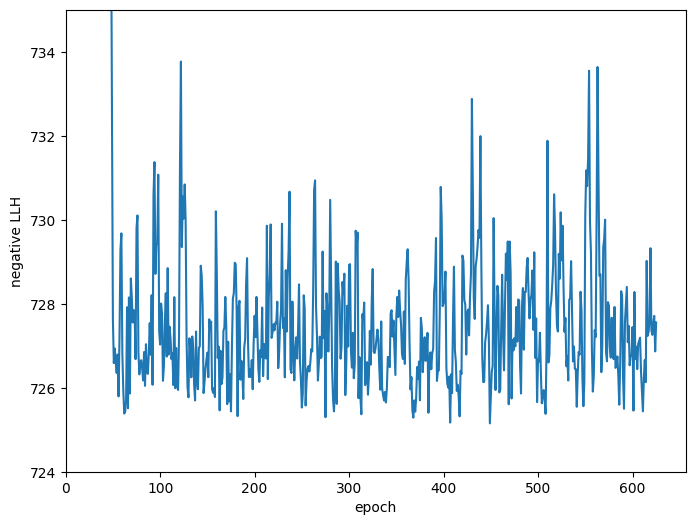

In [32]:
fig = plt.figure()
ax = fig.add_subplot()
no_ = np.arange(0, len(theta_accept),1)
_z = [-logLikeli(theta) for theta in theta_accept]
ax.plot(no_, _z)
ax.set_xlabel('epoch')
ax.set_ylabel('negative LLH')
ax.set_xlim(left=0)
ax.set_ylim(bottom=724,top=735)
plt.show()

acceptance rate = 0.216


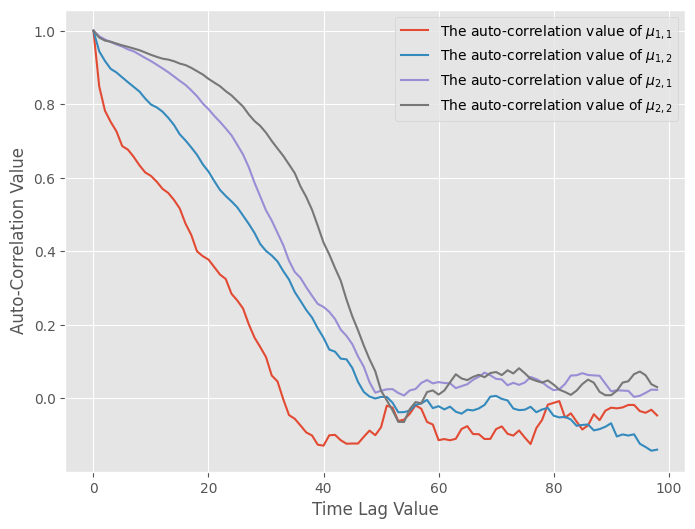

In [33]:
def U1(theta: List[float]) -> float:
    '''
    the potential energy function: 
    U(theta) = -log(probability distribution of theta)
    '''
    return - logLikeli(theta)

def grad_U1(theta: List[float]) -> float:
    '''
    the derivative of the potential energy function
    dU/dmu
    '''
    DRho = gmm1.dfdx_1(theta)
    Rho = - logLikeli(theta)
    return np.array([dRho/Rho for dRho in DRho])

theta_accept1, theta_reject1 = HMC(epoch=3000, L=20, epsilon=0.01, U=U1, grad_U=grad_U1, current_theta=np.array([0,0,0,0]))

print("acceptance rate =", len(theta_accept1)/(len(theta_accept1)+len(theta_reject1)))

auto_corr_plot(theta_accept1, plot_nth_theta=[0,1,2,3],theta_index=['$\mu_{1,1}$','$\mu_{1,2}$','$\mu_{2,1}$','$\mu_{2,2}$'],data_range=[0,3000],figsize=[8,6])

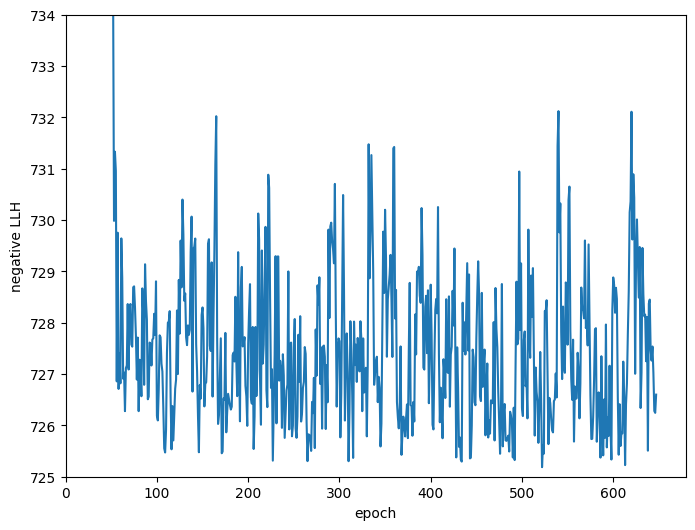

In [38]:
fig = plt.figure()
ax = fig.add_subplot()
no_ = np.arange(0, len(theta_accept1),1)
_z = [-gmm1.calculate_log_likelihoods_mu(theta) for theta in theta_accept1]
ax.plot(no_, _z)
ax.set_xlabel('epoch')
ax.set_ylabel('negative LLH')
ax.set_xlim(left=0)
ax.set_ylim(bottom=725,top=734)
plt.show()

acceptance rate = 0.22033333333333333


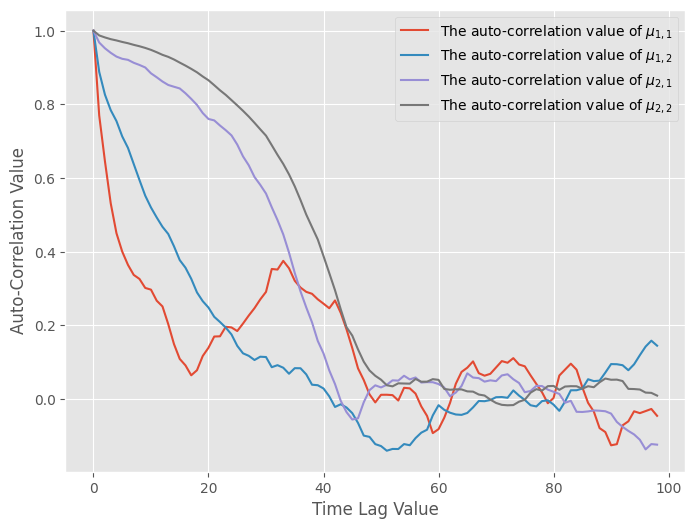

In [39]:
def U2(theta: List[float]) -> float:
    '''
    the potential energy function: 
    U(theta) = -log(probability distribution of theta)
    '''
    return - logLikeli(theta)

def grad_U2(theta: List[float]) -> float:
    '''
    the derivative of the potential energy function
    dU/dmu
    '''
    DRho = gmm1.dfdx_2(theta)
    Rho = - logLikeli(theta)
    return np.array([dRho/Rho for dRho in DRho])

theta_accept2, theta_reject2 = HMC(epoch=3000, L=20, epsilon=0.01, U=U1, grad_U=grad_U1, current_theta=np.array([0,0,0,0]))

print("acceptance rate =", len(theta_accept2)/(len(theta_accept2)+len(theta_reject2)))

auto_corr_plot(theta_accept2, plot_nth_theta=[0,1,2,3],theta_index=['$\mu_{1,1}$','$\mu_{1,2}$','$\mu_{2,1}$','$\mu_{2,2}$'],data_range=[0,3000],figsize=[8,6])

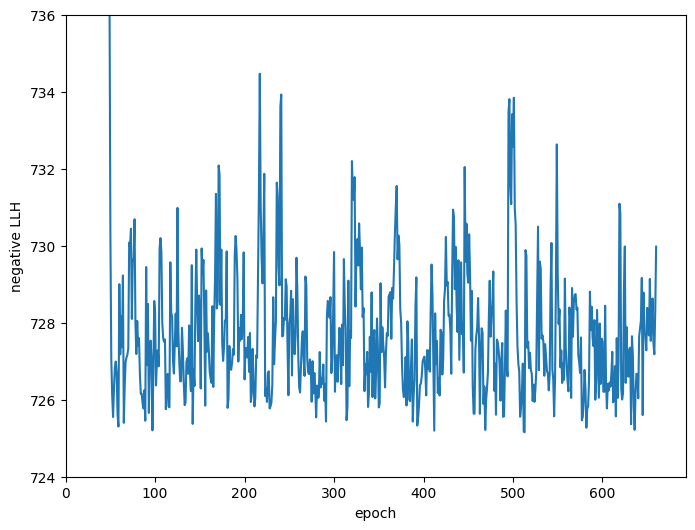

In [46]:
fig = plt.figure()
ax = fig.add_subplot()
no_ = np.arange(0, len(theta_accept2),1)
_z = [-gmm1.calculate_log_likelihoods_mu(theta) for theta in theta_accept2]
ax.plot(no_, _z)
ax.set_xlabel('epoch')
ax.set_ylabel('negative LLH')
ax.set_xlim(left=0)
ax.set_ylim(bottom=724,top=736)
plt.show()